<a href="https://colab.research.google.com/github/l-bat/ml/blob/master/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving datatest.txt to datatest.txt


In [0]:
data = pd.read_csv('datatest.txt')

In [45]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


**Описание данных *Occupancy Detection Data Set*:**

* Дата: год-месяц-день час:минута:секунда
* Температура, в градусах Цельсия
* Относительная влажность, %
* Свет, в Lux
* CO2, в ppm
* Влажность, рассчитывается с использованием температуры и относительной влажности, в kgwater-vapor/kg-air
* Занятость комнаты: {0, 1}, 0 - не занята, 1 - занята


In [9]:
data.shape

(2665, 7)

Выведем названия столбцов

In [14]:
data.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

Посмотрим общую характеристику текущего набора

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [10]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Построим матрицу ковариации

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63b69d5d68>,
      dtype=object)

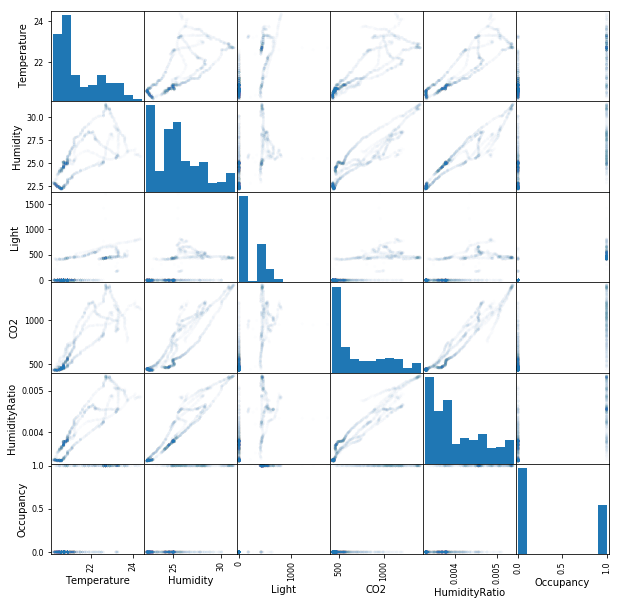

In [13]:
from pandas.plotting import scatter_matrix


scatter_matrix(data, alpha = .01, figsize = (10, 10))

In [16]:
data.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


In [17]:
data['Temperature'].unique()

array([23.7       , 23.718     , 23.73      , 23.7225    , 23.754     ,
       23.76      , 23.736     , 23.745     , 23.6       , 23.64      ,
       23.65      , 23.625     , 23.61666667, 23.66666667, 23.575     ,
       23.54      , 23.525     , 23.5       , 23.445     , 23.39      ,
       23.37      , 23.37333333, 23.32333333, 23.365     , 23.29      ,
       23.30666667, 23.272     , 23.2       , 23.23      , 23.215     ,
       23.14      , 23.15      , 23.18      , 23.11666667, 23.1       ,
       23.06      , 23.02      , 23.01      , 23.        , 22.98166667,
       22.945     , 22.956     , 22.9725    , 22.912     , 22.89      ,
       22.865     , 22.87333333, 22.815     , 22.84      , 22.79      ,
       22.772     , 22.76      , 22.7       , 22.7225    , 22.68      ,
       22.64      , 22.6       , 22.66666667, 22.62      , 22.625     ,
       22.65      , 22.56      , 22.58      , 22.575     , 22.55      ,
       22.56666667, 22.525     , 22.54      , 22.5       , 22.52

Разделим имеющиеся столбцы на категориальные и на числовые

In [0]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

In [19]:
categorical_columns

['date']

In [20]:
numerical_columns

['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']

Найдем пропуски в данных

In [21]:
data[numerical_columns].count(axis = 0)

Temperature      2665
Humidity         2665
Light            2665
CO2              2665
HumidityRatio    2665
Occupancy        2665
dtype: int64

Очень хорошие данные) Пропусков нет

## Векторизация

In [0]:
categorical_columns = pd.get_dummies(data[categorical_columns])

In [27]:
categorical_columns.columns

Index(['date_2015-02-02 14:19:00', 'date_2015-02-02 14:19:59',
       'date_2015-02-02 14:21:00', 'date_2015-02-02 14:22:00',
       'date_2015-02-02 14:23:00', 'date_2015-02-02 14:23:59',
       'date_2015-02-02 14:25:00', 'date_2015-02-02 14:25:59',
       'date_2015-02-02 14:26:59', 'date_2015-02-02 14:28:00',
       ...
       'date_2015-02-04 10:34:00', 'date_2015-02-04 10:34:59',
       'date_2015-02-04 10:36:00', 'date_2015-02-04 10:37:00',
       'date_2015-02-04 10:38:00', 'date_2015-02-04 10:38:59',
       'date_2015-02-04 10:40:00', 'date_2015-02-04 10:40:59',
       'date_2015-02-04 10:41:59', 'date_2015-02-04 10:43:00'],
      dtype='object', length=2665)

В данном случае имеется один категориальный признак - дата. Применять OneHotEncoder к нему не имеет смысла - получим огромное число столбцов, но никак не улучшим качество предсказаний. Лучше сделаем дату индексом нашей таблицы.

In [0]:
data.set_index('date', inplace=True)

## Нормализация количественных признаков

In [28]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Все признаки количественные, нормализуем всю таблицу

In [0]:
data = (data - data.mean(axis = 0)) / data.std(axis = 0)

In [48]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03
mean,3.319024e-13,1.344833e-14,8.348544e-17,1.243950e-16,6.466264e-14,3.324920e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.200241e+00,-1.335309e+00,-7.722587e-01,-9.922262e-01,-1.185274e+00,-7.575707e-01
25%,-7.625076e-01,-8.592828e-01,-7.722587e-01,-8.606840e-01,-8.148558e-01,-7.575707e-01
50%,-5.290501e-01,-1.452440e-01,-7.722587e-01,-4.694740e-01,-3.471171e-01,-7.575707e-01
75%,8.976349e-01,6.166709e-01,9.962493e-01,8.146285e-01,8.263135e-01,1.319514e+00
max,2.893373e+00,2.510857e+00,6.011019e+00,2.338183e+00,2.212265e+00,1.319514e+00


## X и y

In [0]:
X = data.drop(('Occupancy'), axis = 1) # выбрасываем столбец 'Occupancy'
y = data['Occupancy']
feature_names = X.columns

In [50]:
type(feature_names)

pandas.core.indexes.base.Index

In [51]:
feature_names

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

In [52]:
X.shape

(2665, 5)

In [53]:
y.shape

(2665,)

In [54]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

1865 800


In [55]:
X_train.shape 


(1865, 5)

In [56]:
X_test.shape 

(800, 5)